# Chapter 7: Ensemble Learning & Random Forests

### Ensure GPU Env is working correctly

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  1


In [3]:
import sys
import os
sys.version

'3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]'

## Law of large numbers with 51% probability heads vs tails

In [1]:
import numpy as np
heads_pro = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_pro).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

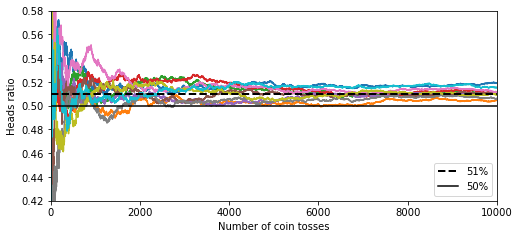

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

## Voting Classifers in Scikit-Learn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### soft voting 

In [7]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## Bagging and Pasting in Scikit-Learn

In [9]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.92


In [11]:
# Regular Decision Tree Classification
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [12]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.92


## Decision Tree Plot W/ and W/O Bagging

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.8, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.8, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

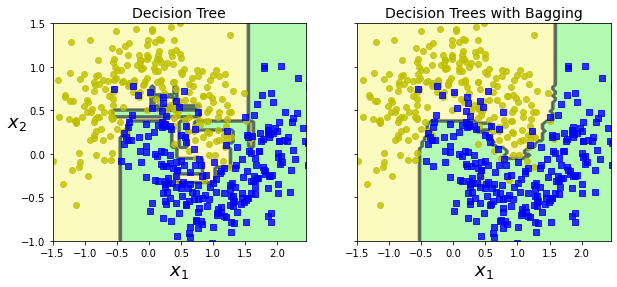

In [15]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Out-of-Bag Evaluation

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.888

In [17]:
bag_clf.oob_decision_function_

array([[0.41237113, 0.58762887],
       [0.34415584, 0.65584416],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07954545, 0.92045455],
       [0.31343284, 0.68656716],
       [0.00512821, 0.99487179],
       [1.        , 0.        ],
       [0.96273292, 0.03726708],
       [0.7688172 , 0.2311828 ],
       [0.01578947, 0.98421053],
       [0.76243094, 0.23756906],
       [0.87962963, 0.12037037],
       [0.96132597, 0.03867403],
       [0.05670103, 0.94329897],
       [0.        , 1.        ],
       [0.96551724, 0.03448276],
       [0.91578947, 0.08421053],
       [1.        , 0.        ],
       [0.01666667, 0.98333333],
       [0.33529412, 0.66470588],
       [0.95555556, 0.04444444],
       [1.        , 0.        ],
       [0.96648045, 0.03351955],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6031746 , 0.3968254 ],
       [0.

In [18]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [20]:
#equivalent to random forest
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500)

In [21]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [22]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

0.968

In [23]:
#Another similar Bagging instance
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes =16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [24]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [25]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # also yields very similar predictions

0.968

## Feature Importance (IRIS Data Example)

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0979437702472004
sepal width (cm) 0.02446310198067065
petal length (cm) 0.4244117540591977
petal width (cm) 0.4531813737129314


In [27]:
rnd_clf.feature_importances_

array([0.09794377, 0.0244631 , 0.42441175, 0.45318137])

## Pixel Importance

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=100)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier()

In [30]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

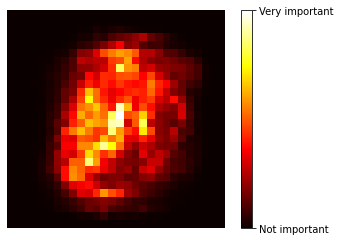

In [31]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

## Boosting

### AdaBoost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

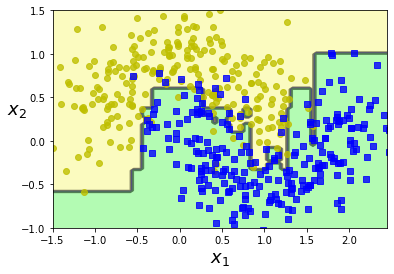

In [33]:
plot_decision_boundary(ada_clf, X, y)

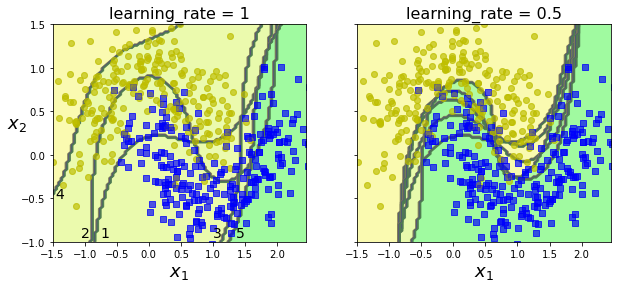

In [34]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

## Gradient Boosting

In [35]:
np.random.seed()
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [36]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [37]:
y2 = y - tree_reg1.predict(X) #residual errors
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [38]:
y3 = y2 - tree_reg2.predict(X) #residual errors for second iteration
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [39]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.74907096])

## Gradient Boosting training visualization

In [40]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

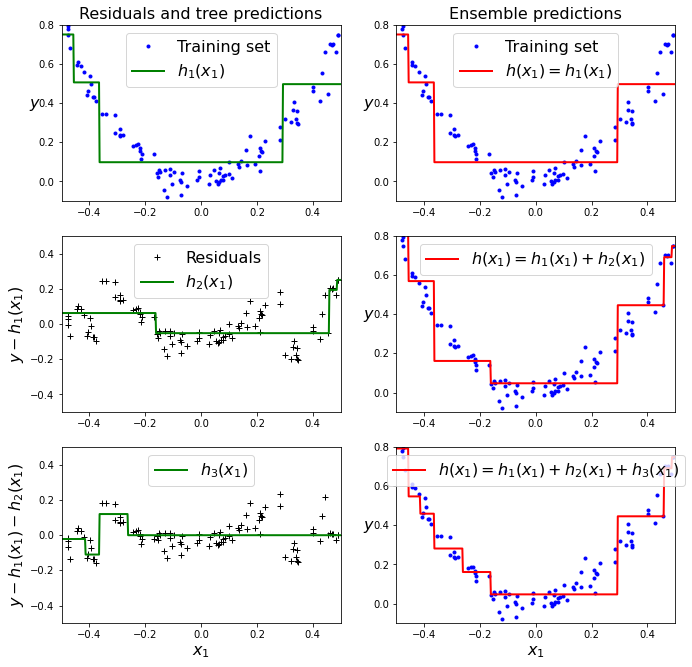

In [41]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### Sklearn GradientBoostingRegressor

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

### GRBT ensembles with not enough and too many trees

In [43]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

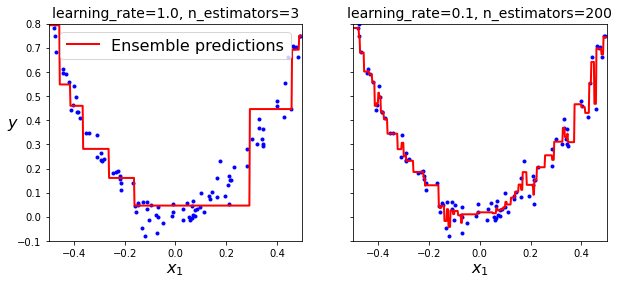

In [44]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Gradient Boosting w/ Early Stoppping

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=52, random_state=42)

### Visualization of Validation Errors and Best Model Prediction

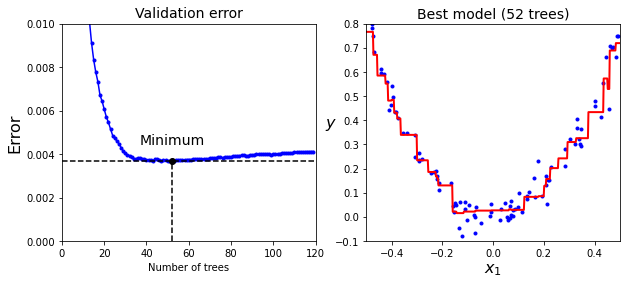

In [46]:
min_error = np.min(errors)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### Early stopping using warm_start

In [47]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 4:
            break  # early stopping

In [48]:
print(gbrt.n_estimators)

48


In [49]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.003704475381626584


## XGBoost

In [50]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [51]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)          

Validation MSE: 0.0042663795439508495


In [52]:
if xgboost is not None:  
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) 
    print("Validation MSE:", val_error)           

[0]	validation_0-rmse:0.24544
[1]	validation_0-rmse:0.17505
[2]	validation_0-rmse:0.12964
[3]	validation_0-rmse:0.09800
[4]	validation_0-rmse:0.07785
[5]	validation_0-rmse:0.06693
[6]	validation_0-rmse:0.06177
[7]	validation_0-rmse:0.05973
[8]	validation_0-rmse:0.05915
[9]	validation_0-rmse:0.05966
Validation MSE: 0.003498100708446758


# End of Chapter Exercises

1. If you have trained five different models on the exact same training data, and
   they all achieve 95% precision, is there any chance that you can combine these
   models to get better results? If so, how? If not, why?
   
   
2. What is the difference between hard and soft voting classifiers?


3. Is it possible to speed up training of a bagging ensemble by distributing it across
   multiple servers? What about pasting ensembles, boosting ensembles, Random
   Forests, or stacking ensembles?
   
   
4. What is the benefit of out-of-bag evaluation?


5. What makes Extra-Trees more random than regular Random Forests? How can
   this extra randomness help? Are Extra-Trees slower or faster than regular Ran
   dom Forests?
   
   
6. If your AdaBoost ensemble underfits the training data, which hyperparameters
   should you tweak and how?
   
   
7. If your Gradient Boosting ensemble overfits the training set, should you increase
   or decrease the learning rate?
   
   
8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a
   validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). Then train various classifiers, such as a Random
   Forest classifier, an ExtraTrees classifier, and an SVM classifier. Next, try to combine them into an ensemble that outperforms each individual classifier on the
   validation set, using soft or hard voting. Once you have found one, try it on the
   test set. How much better does it perform compared to the individual classifiers?
   
   
9. Run the individual classifiers from the previous exercise to make predictions on
   the validation set, and create a new training set with the resulting predictions:
   each training instance is a vector containing the set of predictions from all your
   classifiers for an image, and the target is the image’s class. Train a classifier on
   this new training set. Congratulations, you have just trained a blender, and
   together with the classifiers it forms a stacking ensemble! Now evaluate the
   ensemble on the test set. For each image in the test set, make predictions with all
   your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?

***1. If you have trained five different models on the exact same training data, and
   they all achieve 95% precision, is there any chance that you can combine these
   models to get better results? If so, how? If not, why?***
   
A: Depending on the complexity of these models you could use a boosting system. For ex, if they are stumps you could use AdaBoost but if that is not the case there are still ways to combine these to get a better result. One option is using bagging (W/ replacement) or Pasting (W/O replacement). But typically this works best for DecisionTree Algorithms. The best bet would be to use Ensemble methods such as voting classifiers. This created a better classifer to aggregate predictions of each classifer and predict the classes that recieve the most votes (AKA: hard voting classifer).

***2. What is the difference between hard and soft voting classifiers?***

A: A hard voting classifier aggregates predictions of the classifiers and predicts the class with the most votes. Soft voting classifiers predict the class with the highest class probabilities averaged over all of the individual classifers (hgihly confident votes as opposed to the most).

***3. Is it possible to speed up training of a bagging ensemble by distributing it across
   multiple servers? What about pasting ensembles, boosting ensembles, Random
   Forests, or stacking ensembles?***
   
A: Yes, you can span it across multiple CPUs on your device. You train them in parallel. This is generally faster than training them all on one server or CPU. The Sklearn API for the RandomForestClassifer, BaggingClassifer and StackingClassifer all have the option to run these jobs in parallel. 

***4. What is the benefit of out-of-bag evaluation?***

A: The out of bag instances are usually never seen by the predictor during training via sampling. The benefit of using these instances are that they could be used as your validation set instead of using an entirely different one. So it saves you the trouble there. 

***5. What makes Extra-Trees more random than regular Random Forests? How can
   this extra randomness help? Are Extra-Trees slower or faster than regular Ran
   dom Forests?***
   
A: In a Random Forest, only a random subset at each node is considered for splitting. Where in Extra-Trees it is the same but instead of searching for the best possible thresholds, it will use random thresholds for each feature. This extra randomness helps in the bias/variance tradeoff. Specifically, it trades more bias for a lower variance on the training data. It is also much faster to train than Random Forests. This is because Random Forests is looking for the best possible threshold where Extra-Trees does not simply care. 

***6. If your AdaBoost ensemble underfits the training data, which hyperparameters
   should you tweak and how?***

You should tweak the learning rate by increasing it so it better fits the data and also the about of estimators or decision tree stumps can help. In this case, increasing the number of estimators can be of assistance. 

***7. If your Gradient Boosting ensemble overfits the training set, should you increase
   or decrease the learning rate?***
   
A: If you are overfitting on the training set using Gradient Boosting, you should decrease the learning rate as the prediction will generalize better. Be careful though, by doing this you will need more trees in the ensemble to fit the training data. You could also use early stopping when checking the error validation as well. 

In [64]:
# Question 8
''' Load the MNIST data (introduced in Chapter 3), and split it 
into a training set, a validation set, and a test set 
(e.g., use 50,000 instances for training, 10,000 for validation,
and 10,000 for testing). Then train various classifiers, 
such as a Random Forest classifier, an ExtraTrees classifier, 
and an SVM classifier. Next, try to combine them into an ensemble 
that outperforms each individual classifier on the validation set, 
using soft or hard voting. Once you have found one, try it on the test set.
How much better does it perform compared to the individual classifiers?'''

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# Training set and testing set
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000)
# Validation set from training set
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=10000)

In [65]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC

RFC = RandomForestClassifier(n_estimators=100)
ETC = ExtraTreesClassifier(n_estimators=100)
SVC = LinearSVC(max_iter=100, tol=1, C=5.0)

In [66]:
estimators = [RFC, ETC, SVC]
for estimator in estimators:
    print("Training a", estimator)
    estimator.fit(X_train_val, y_train_val)

Training a RandomForestClassifier()
Training a ExtraTreesClassifier()
Training a LinearSVC(C=5.0, max_iter=100, tol=1)


D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [67]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9673, 0.971, 0.8404]

In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
named_estimators = [
    ("RFC", RFC),
    ("ETC", ETC),
    ("SVC", SVC),]

In [70]:
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train_val, y_train_val)

D:\Anaconda\envs\GPUenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('ETC', ExtraTreesClassifier()),
                             ('SVC', LinearSVC(C=5.0, max_iter=100, tol=1))])

In [71]:
voting_clf.score(X_val, y_val)

0.9682

In [75]:
# refer to original performances
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9673, 0.971, 0.8404]

In [76]:
# remove SVC
voting_clf.set_params(SVC=None)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('ETC', ExtraTreesClassifier()), ('SVC', None)])

In [77]:
voting_clf.estimators

[('RFC', RandomForestClassifier()),
 ('ETC', ExtraTreesClassifier()),
 ('SVC', None)]

In [78]:
#Did not delete from trained estimators. Need to delete outright or retrain model,we will try both and see if there is 
# a difference
voting_clf.estimators_

[RandomForestClassifier(),
 ExtraTreesClassifier(),
 LinearSVC(C=5.0, max_iter=100, tol=1)]

In [79]:
del voting_clf.estimators_[2]

In [80]:
# improvement W/O SVC 
voting_clf.score(X_val, y_val)

0.9695

In [83]:
# Now with retraining
named_estimators_2 = [
    ("RFC", RFC),
    ("ETC", ETC),
]

voting_clf = VotingClassifier(named_estimators_2)
voting_clf.fit(X_train_val, y_train_val)

VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                             ('ETC', ExtraTreesClassifier())])

In [84]:
# a tad bit better
voting_clf.score(X_val, y_val)

0.9696

In [85]:
# Now try the better model with soft voting (better in this case)
voting_clf.voting = "soft"
voting_clf.score(X_val, y_val)

0.9706

In [87]:
# Now for the test set
voting_clf.score(X_test, y_test)

0.9696

In [99]:
# Question 9
'''Run the individual classifiers from the previous exercise to make 
predictions on the validation set, and create a new training set with 
the resulting predictions: each training instance is a vector containing 
the set of predictions from all your classifiers for an image, and the target 
is the image’s class. Train a classifier on this new training set. Congratulations,
you have just trained a blender, and together with the classifiers it forms a stacking 
ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make 
predictions with all your classifiers, then feed the predictions to the blender to get the 
ensemble’s predictions. How does it compare to the voting classifier you trained earlier?'''

X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [100]:
X_val_predictions

array([[0., 0.],
       [6., 6.],
       [1., 1.],
       ...,
       [3., 3.],
       [7., 7.],
       [0., 0.]], dtype=float32)

In [108]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [109]:
rnd_forest_blender.oob_score_

0.9504

*Exercise: Congratulations, you have just trained a blender, and together with the classifiers they form a stacking ensemble! Now let's evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble's predictions. How does it compare to the voting classifier you trained earlier?*

In [110]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [111]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test, y_pred)

1.0

Wow! Perfect classification in this instance!